# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [7]:
import torch
from torchvision import datasets, transforms
import helper
from collections import OrderedDict

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

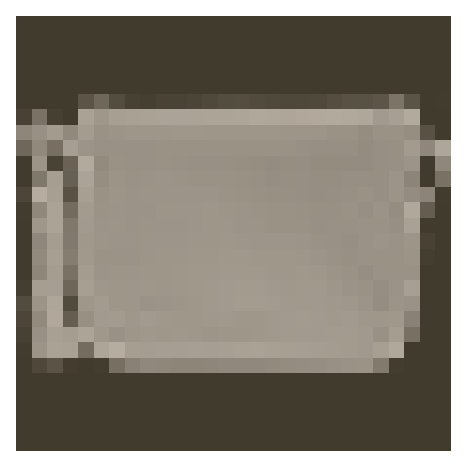

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [28]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [400,200,100]
output_size = 10

#feed-forward network
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
    ('relu3', nn.ReLU()),
    ('logits', nn.Linear(hidden_sizes[2], output_size))]))
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=100, out_features=10, bias=True)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [29]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [32]:
# TODO: Train the network here
images, labels = next(iter(trainloader))
images.resize_(64, 784)
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        #flatten images
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()

        #Forward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        #Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss=0



Epoch: 1/3...  Loss: 0.1110
Epoch: 1/3...  Loss: 0.0609
Epoch: 1/3...  Loss: 0.0569
Epoch: 1/3...  Loss: 0.0504
Epoch: 1/3...  Loss: 0.0499
Epoch: 1/3...  Loss: 0.0475
Epoch: 1/3...  Loss: 0.0446
Epoch: 1/3...  Loss: 0.0351
Epoch: 1/3...  Loss: 0.0302
Epoch: 1/3...  Loss: 0.0326
Epoch: 1/3...  Loss: 0.0291
Epoch: 1/3...  Loss: 0.0362
Epoch: 1/3...  Loss: 0.0356
Epoch: 1/3...  Loss: 0.0314
Epoch: 1/3...  Loss: 0.0348
Epoch: 1/3...  Loss: 0.0260
Epoch: 1/3...  Loss: 0.0399
Epoch: 1/3...  Loss: 0.0335
Epoch: 1/3...  Loss: 0.0329
Epoch: 1/3...  Loss: 0.0240
Epoch: 1/3...  Loss: 0.0360
Epoch: 1/3...  Loss: 0.0289
Epoch: 1/3...  Loss: 0.0237
Epoch: 1/3...  Loss: 0.0236
Epoch: 1/3...  Loss: 0.0256
Epoch: 1/3...  Loss: 0.0221
Epoch: 1/3...  Loss: 0.0287
Epoch: 1/3...  Loss: 0.0328
Epoch: 1/3...  Loss: 0.0340
Epoch: 1/3...  Loss: 0.0243
Epoch: 1/3...  Loss: 0.0215
Epoch: 1/3...  Loss: 0.0241
Epoch: 1/3...  Loss: 0.0243
Epoch: 1/3...  Loss: 0.0155
Epoch: 1/3...  Loss: 0.0173
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0105
Epoch: 1/3...  Loss: 0.0122
Epoch: 1/3...  Loss: 0.0114
Epoch: 1/3...  Loss: 0.0140
Epoch: 1/3...  Loss: 0.0117
Epoch: 1/3...  Loss: 0.0109
Epoch: 1/3...  Loss: 0.0128
Epoch: 1/3...  Loss: 0.0126
Epoch: 1/3...  Loss: 0.0118
Epoch: 1/3...  Loss: 0.0103
Epoch: 1/3...  Loss: 0.0157
Epoch: 1/3...  Loss: 0.0136
Epoch: 1/3...  Loss: 0.0104
Epoch: 1/3...  Loss: 0.0119
Epoch: 1/3...  Loss: 0.0138
Epoch: 1/3...  Loss: 0.0214
Epoch: 1/3...  Loss: 0.0178
Epoch: 1/3...  Loss: 0.0097
Epoch: 1/3...  Loss: 0.0161
Epoch: 1/3...  Loss: 0.0093
Epoch: 1/3...  Loss: 0.0157
Epoch: 1/3...  Loss: 0.0174
Epoch: 1/3...  Loss: 0.0174
Epoch: 1/3...  Loss: 0.0138
Epoch: 1/3...  Loss: 0.0202
Epoch: 1/3...  Loss: 0.0163
Epoch: 1/3...  Loss: 0.0234
Epoch: 1/3...  Loss: 0.0159
Epoch: 1/3...  Loss: 0.0192
Epoch: 1/3...  Loss: 0.0167
Epoch: 1/3...  Loss: 0.0167
Epoch: 1/3...  Loss: 0.0141
Epoch: 1/3...  Loss: 0.0206
Epoch: 1/3...  Loss: 0.0181
Epoch: 1/3...  Loss: 0.0154
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0111
Epoch: 1/3...  Loss: 0.0155
Epoch: 1/3...  Loss: 0.0150
Epoch: 1/3...  Loss: 0.0168
Epoch: 1/3...  Loss: 0.0148
Epoch: 1/3...  Loss: 0.0133
Epoch: 1/3...  Loss: 0.0164
Epoch: 1/3...  Loss: 0.0140
Epoch: 1/3...  Loss: 0.0128
Epoch: 1/3...  Loss: 0.0177
Epoch: 1/3...  Loss: 0.0125
Epoch: 1/3...  Loss: 0.0078
Epoch: 1/3...  Loss: 0.0113
Epoch: 1/3...  Loss: 0.0086
Epoch: 1/3...  Loss: 0.0165
Epoch: 1/3...  Loss: 0.0123
Epoch: 1/3...  Loss: 0.0161
Epoch: 1/3...  Loss: 0.0173
Epoch: 1/3...  Loss: 0.0172
Epoch: 1/3...  Loss: 0.0169
Epoch: 1/3...  Loss: 0.0187
Epoch: 1/3...  Loss: 0.0090
Epoch: 1/3...  Loss: 0.0198
Epoch: 1/3...  Loss: 0.0176
Epoch: 1/3...  Loss: 0.0163
Epoch: 1/3...  Loss: 0.0108
Epoch: 1/3...  Loss: 0.0088
Epoch: 1/3...  Loss: 0.0157
Epoch: 1/3...  Loss: 0.0154
Epoch: 1/3...  Loss: 0.0076
Epoch: 1/3...  Loss: 0.0207
Epoch: 1/3...  Loss: 0.0191
Epoch: 1/3...  Loss: 0.0136
Epoch: 1/3...  Loss: 0.0096
Epoch: 1/3...  Loss: 0.0115
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.0099
Epoch: 1/3...  Loss: 0.0114
Epoch: 1/3...  Loss: 0.0208
Epoch: 1/3...  Loss: 0.0092
Epoch: 1/3...  Loss: 0.0108
Epoch: 1/3...  Loss: 0.0117
Epoch: 1/3...  Loss: 0.0166
Epoch: 1/3...  Loss: 0.0177
Epoch: 1/3...  Loss: 0.0093
Epoch: 1/3...  Loss: 0.0153
Epoch: 1/3...  Loss: 0.0138
Epoch: 1/3...  Loss: 0.0105
Epoch: 1/3...  Loss: 0.0167
Epoch: 1/3...  Loss: 0.0092
Epoch: 1/3...  Loss: 0.0267
Epoch: 1/3...  Loss: 0.0130
Epoch: 1/3...  Loss: 0.0110
Epoch: 1/3...  Loss: 0.0084
Epoch: 1/3...  Loss: 0.0121
Epoch: 1/3...  Loss: 0.0142
Epoch: 1/3...  Loss: 0.0180
Epoch: 1/3...  Loss: 0.0110
Epoch: 1/3...  Loss: 0.0085
Epoch: 1/3...  Loss: 0.0120
Epoch: 1/3...  Loss: 0.0119
Epoch: 1/3...  Loss: 0.0147
Epoch: 1/3...  Loss: 0.0098
Epoch: 1/3...  Loss: 0.0122
Epoch: 1/3...  Loss: 0.0133
Epoch: 1/3...  Loss: 0.0153
Epoch: 1/3...  Loss: 0.0158
Epoch: 1/3...  Loss: 0.0097
Epoch: 1/3...  Loss: 0.0155
Epoch: 1/3...  Loss: 0.0143
Epoch: 1/3...  Loss: 0.0088
Epoch: 1/3...  Loss:

Epoch: 2/3...  Loss: 0.0118
Epoch: 2/3...  Loss: 0.0151
Epoch: 2/3...  Loss: 0.0148
Epoch: 2/3...  Loss: 0.0072
Epoch: 2/3...  Loss: 0.0151
Epoch: 2/3...  Loss: 0.0179
Epoch: 2/3...  Loss: 0.0106
Epoch: 2/3...  Loss: 0.0128
Epoch: 2/3...  Loss: 0.0138
Epoch: 2/3...  Loss: 0.0147
Epoch: 2/3...  Loss: 0.0115
Epoch: 2/3...  Loss: 0.0110
Epoch: 2/3...  Loss: 0.0112
Epoch: 2/3...  Loss: 0.0122
Epoch: 2/3...  Loss: 0.0097
Epoch: 2/3...  Loss: 0.0138
Epoch: 2/3...  Loss: 0.0131
Epoch: 2/3...  Loss: 0.0172
Epoch: 2/3...  Loss: 0.0126
Epoch: 2/3...  Loss: 0.0117
Epoch: 2/3...  Loss: 0.0148
Epoch: 2/3...  Loss: 0.0128
Epoch: 2/3...  Loss: 0.0169
Epoch: 2/3...  Loss: 0.0128
Epoch: 2/3...  Loss: 0.0143
Epoch: 2/3...  Loss: 0.0108
Epoch: 2/3...  Loss: 0.0079
Epoch: 2/3...  Loss: 0.0127
Epoch: 2/3...  Loss: 0.0133
Epoch: 2/3...  Loss: 0.0106
Epoch: 2/3...  Loss: 0.0160
Epoch: 2/3...  Loss: 0.0141
Epoch: 2/3...  Loss: 0.0083
Epoch: 2/3...  Loss: 0.0059
Epoch: 2/3...  Loss: 0.0093
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.0077
Epoch: 2/3...  Loss: 0.0066
Epoch: 2/3...  Loss: 0.0110
Epoch: 2/3...  Loss: 0.0131
Epoch: 2/3...  Loss: 0.0093
Epoch: 2/3...  Loss: 0.0108
Epoch: 2/3...  Loss: 0.0082
Epoch: 2/3...  Loss: 0.0119
Epoch: 2/3...  Loss: 0.0103
Epoch: 2/3...  Loss: 0.0114
Epoch: 2/3...  Loss: 0.0128
Epoch: 2/3...  Loss: 0.0166
Epoch: 2/3...  Loss: 0.0163
Epoch: 2/3...  Loss: 0.0077
Epoch: 2/3...  Loss: 0.0103
Epoch: 2/3...  Loss: 0.0118
Epoch: 2/3...  Loss: 0.0075
Epoch: 2/3...  Loss: 0.0098
Epoch: 2/3...  Loss: 0.0151
Epoch: 2/3...  Loss: 0.0090
Epoch: 2/3...  Loss: 0.0082
Epoch: 2/3...  Loss: 0.0131
Epoch: 2/3...  Loss: 0.0133
Epoch: 2/3...  Loss: 0.0067
Epoch: 2/3...  Loss: 0.0134
Epoch: 2/3...  Loss: 0.0118
Epoch: 2/3...  Loss: 0.0124
Epoch: 2/3...  Loss: 0.0113
Epoch: 2/3...  Loss: 0.0112
Epoch: 2/3...  Loss: 0.0147
Epoch: 2/3...  Loss: 0.0139
Epoch: 2/3...  Loss: 0.0081
Epoch: 2/3...  Loss: 0.0107
Epoch: 2/3...  Loss: 0.0121
Epoch: 2/3...  Loss: 0.0106
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.0119
Epoch: 2/3...  Loss: 0.0099
Epoch: 2/3...  Loss: 0.0146
Epoch: 2/3...  Loss: 0.0219
Epoch: 2/3...  Loss: 0.0140
Epoch: 2/3...  Loss: 0.0116
Epoch: 2/3...  Loss: 0.0106
Epoch: 2/3...  Loss: 0.0089
Epoch: 2/3...  Loss: 0.0106
Epoch: 2/3...  Loss: 0.0110
Epoch: 2/3...  Loss: 0.0131
Epoch: 2/3...  Loss: 0.0146
Epoch: 2/3...  Loss: 0.0098
Epoch: 2/3...  Loss: 0.0117
Epoch: 2/3...  Loss: 0.0092
Epoch: 2/3...  Loss: 0.0144
Epoch: 2/3...  Loss: 0.0069
Epoch: 2/3...  Loss: 0.0086
Epoch: 2/3...  Loss: 0.0082
Epoch: 2/3...  Loss: 0.0085
Epoch: 2/3...  Loss: 0.0091
Epoch: 2/3...  Loss: 0.0075
Epoch: 2/3...  Loss: 0.0140
Epoch: 2/3...  Loss: 0.0125
Epoch: 2/3...  Loss: 0.0072
Epoch: 2/3...  Loss: 0.0070
Epoch: 2/3...  Loss: 0.0132
Epoch: 2/3...  Loss: 0.0071
Epoch: 2/3...  Loss: 0.0074
Epoch: 2/3...  Loss: 0.0084
Epoch: 2/3...  Loss: 0.0130
Epoch: 2/3...  Loss: 0.0110
Epoch: 2/3...  Loss: 0.0064
Epoch: 2/3...  Loss: 0.0082
Epoch: 2/3...  Loss: 0.0179
Epoch: 2/3...  Loss:

Epoch: 3/3...  Loss: 0.0117
Epoch: 3/3...  Loss: 0.0075
Epoch: 3/3...  Loss: 0.0067
Epoch: 3/3...  Loss: 0.0162
Epoch: 3/3...  Loss: 0.0070
Epoch: 3/3...  Loss: 0.0089
Epoch: 3/3...  Loss: 0.0182
Epoch: 3/3...  Loss: 0.0071
Epoch: 3/3...  Loss: 0.0105
Epoch: 3/3...  Loss: 0.0110
Epoch: 3/3...  Loss: 0.0106
Epoch: 3/3...  Loss: 0.0066
Epoch: 3/3...  Loss: 0.0069
Epoch: 3/3...  Loss: 0.0182
Epoch: 3/3...  Loss: 0.0167
Epoch: 3/3...  Loss: 0.0078
Epoch: 3/3...  Loss: 0.0162
Epoch: 3/3...  Loss: 0.0064
Epoch: 3/3...  Loss: 0.0096
Epoch: 3/3...  Loss: 0.0105
Epoch: 3/3...  Loss: 0.0116
Epoch: 3/3...  Loss: 0.0139
Epoch: 3/3...  Loss: 0.0095
Epoch: 3/3...  Loss: 0.0104
Epoch: 3/3...  Loss: 0.0141
Epoch: 3/3...  Loss: 0.0110
Epoch: 3/3...  Loss: 0.0137
Epoch: 3/3...  Loss: 0.0169
Epoch: 3/3...  Loss: 0.0103
Epoch: 3/3...  Loss: 0.0092
Epoch: 3/3...  Loss: 0.0130
Epoch: 3/3...  Loss: 0.0132
Epoch: 3/3...  Loss: 0.0147
Epoch: 3/3...  Loss: 0.0138
Epoch: 3/3...  Loss: 0.0090
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.0078
Epoch: 3/3...  Loss: 0.0131
Epoch: 3/3...  Loss: 0.0116
Epoch: 3/3...  Loss: 0.0108
Epoch: 3/3...  Loss: 0.0100
Epoch: 3/3...  Loss: 0.0115
Epoch: 3/3...  Loss: 0.0091
Epoch: 3/3...  Loss: 0.0092
Epoch: 3/3...  Loss: 0.0085
Epoch: 3/3...  Loss: 0.0078
Epoch: 3/3...  Loss: 0.0110
Epoch: 3/3...  Loss: 0.0105
Epoch: 3/3...  Loss: 0.0191
Epoch: 3/3...  Loss: 0.0116
Epoch: 3/3...  Loss: 0.0094
Epoch: 3/3...  Loss: 0.0082
Epoch: 3/3...  Loss: 0.0064
Epoch: 3/3...  Loss: 0.0162
Epoch: 3/3...  Loss: 0.0127
Epoch: 3/3...  Loss: 0.0157
Epoch: 3/3...  Loss: 0.0076
Epoch: 3/3...  Loss: 0.0104
Epoch: 3/3...  Loss: 0.0089
Epoch: 3/3...  Loss: 0.0097
Epoch: 3/3...  Loss: 0.0125
Epoch: 3/3...  Loss: 0.0154
Epoch: 3/3...  Loss: 0.0112
Epoch: 3/3...  Loss: 0.0152
Epoch: 3/3...  Loss: 0.0134
Epoch: 3/3...  Loss: 0.0089
Epoch: 3/3...  Loss: 0.0069
Epoch: 3/3...  Loss: 0.0118
Epoch: 3/3...  Loss: 0.0162
Epoch: 3/3...  Loss: 0.0107
Epoch: 3/3...  Loss: 0.0079
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.0061
Epoch: 3/3...  Loss: 0.0076
Epoch: 3/3...  Loss: 0.0117
Epoch: 3/3...  Loss: 0.0082
Epoch: 3/3...  Loss: 0.0063
Epoch: 3/3...  Loss: 0.0179
Epoch: 3/3...  Loss: 0.0095
Epoch: 3/3...  Loss: 0.0077
Epoch: 3/3...  Loss: 0.0111
Epoch: 3/3...  Loss: 0.0087
Epoch: 3/3...  Loss: 0.0135
Epoch: 3/3...  Loss: 0.0110
Epoch: 3/3...  Loss: 0.0077
Epoch: 3/3...  Loss: 0.0072
Epoch: 3/3...  Loss: 0.0108
Epoch: 3/3...  Loss: 0.0101
Epoch: 3/3...  Loss: 0.0131
Epoch: 3/3...  Loss: 0.0132
Epoch: 3/3...  Loss: 0.0090
Epoch: 3/3...  Loss: 0.0077
Epoch: 3/3...  Loss: 0.0117
Epoch: 3/3...  Loss: 0.0131
Epoch: 3/3...  Loss: 0.0116
Epoch: 3/3...  Loss: 0.0104
Epoch: 3/3...  Loss: 0.0136
Epoch: 3/3...  Loss: 0.0067
Epoch: 3/3...  Loss: 0.0090
Epoch: 3/3...  Loss: 0.0090
Epoch: 3/3...  Loss: 0.0074
Epoch: 3/3...  Loss: 0.0106
Epoch: 3/3...  Loss: 0.0145
Epoch: 3/3...  Loss: 0.0062
Epoch: 3/3...  Loss: 0.0114
Epoch: 3/3...  Loss: 0.0080
Epoch: 3/3...  Loss: 0.0098
Epoch: 3/3...  Loss:

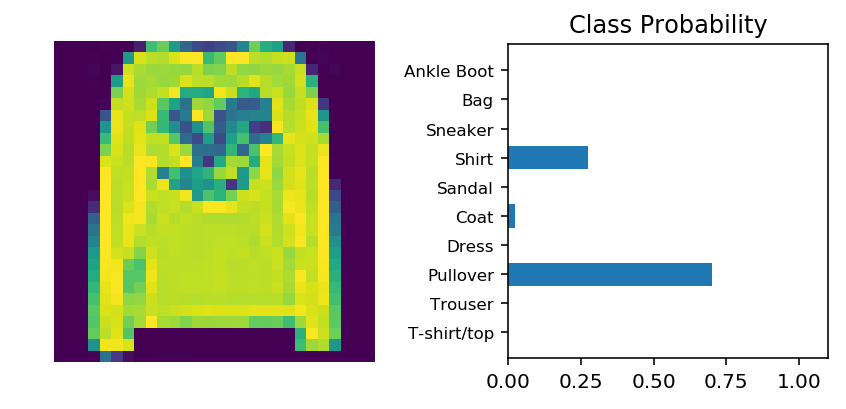

In [57]:
# Test out your network!

images, labels = next(iter(testloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.